In [1]:
import networkx as nx
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

- homeomorphically irreducible tree
- what is a tree and forest?

In [2]:
print(nx.__version__)
print(np.__version__)
print(matplotlib.__version__)

2.4
1.19.1
3.2.2


In [3]:
### Generate a data set of karate club social network 
g = nx.karate_club_graph()
m = nx.adjacency_matrix(g)
m = m.todense()
np.savetxt("matrix_karate_club.txt",m,delimiter=' ')
nx.write_edgelist(g,"edgelist_karate_club.txt",delimiter=' ',data=False)

In [9]:
print(m.shape)
m

(34, 34)


matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]])

### Let's import a network data

In [4]:
g = nx.read_edgelist("edgelist_karate_club.txt",delimiter=' ')

### Import network data from a matrix
#m = np.loadtxt("matrix_karate_club.txt",delimiter=' ') # import adjacency matrix
#g = nx.Graph(m) # convert the matrix into an undirected simple graph


In [38]:
g.degree()

DegreeView({'0': 16, '1': 9, '2': 10, '3': 6, '4': 3, '5': 4, '6': 4, '7': 4, '8': 5, '10': 3, '11': 1, '12': 2, '13': 5, '17': 2, '19': 3, '21': 2, '31': 6, '30': 4, '9': 2, '27': 4, '28': 3, '32': 12, '16': 2, '33': 17, '14': 2, '15': 2, '18': 2, '20': 2, '22': 2, '23': 5, '25': 3, '29': 4, '24': 3, '26': 2})

<IPython.core.display.Javascript object>


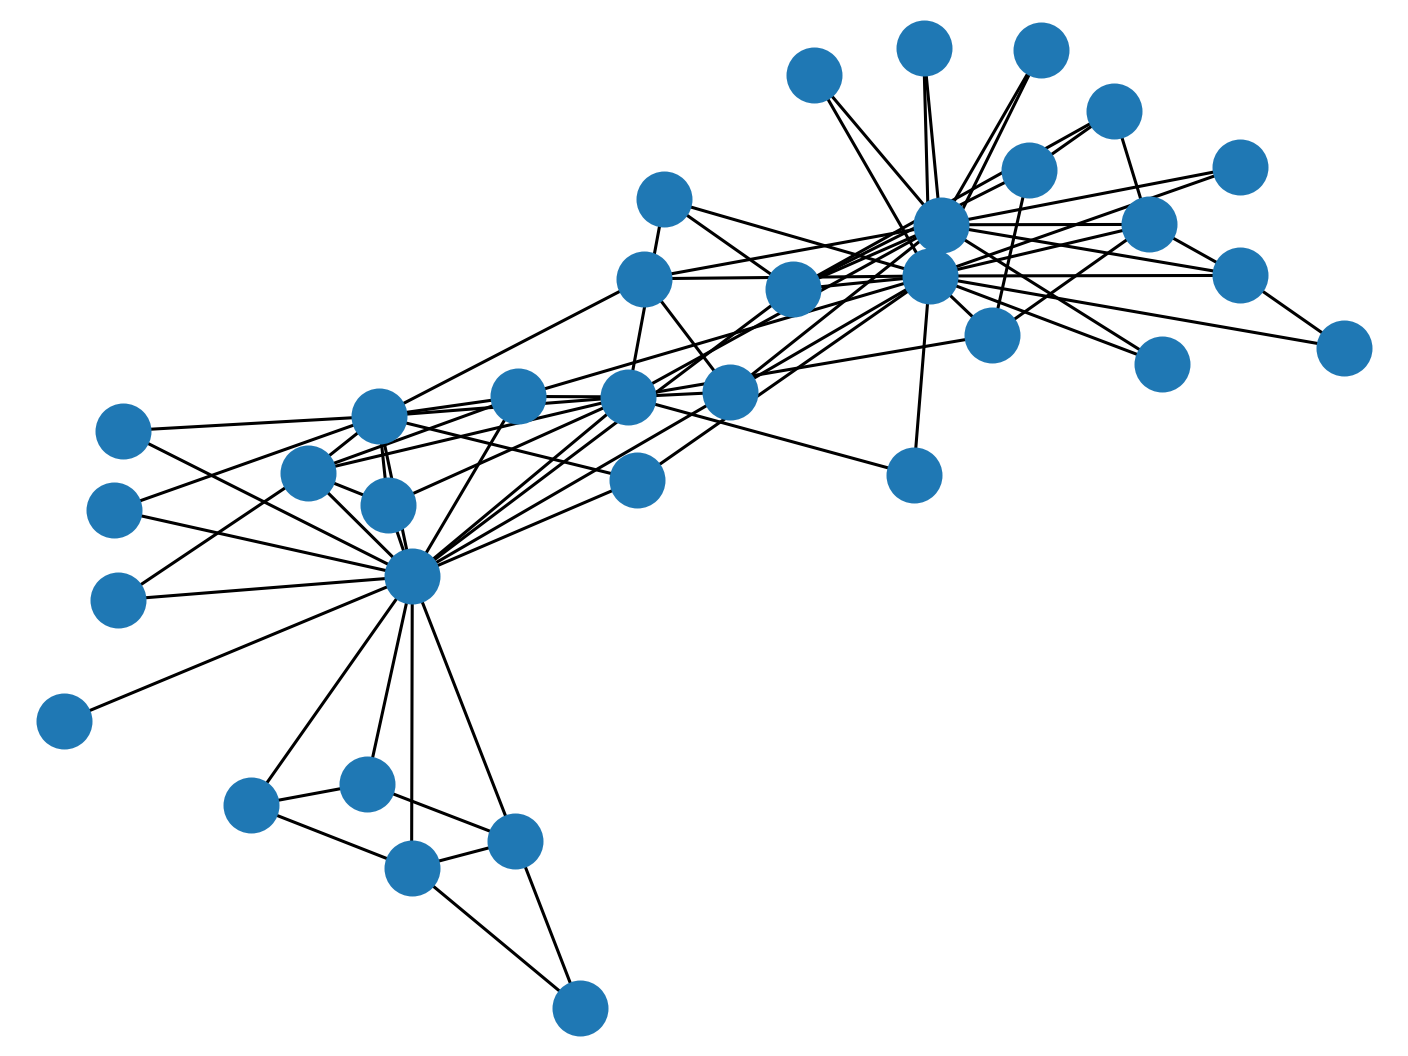

In [5]:
nx.draw(g)
plt.show()

<IPython.core.display.Javascript object>


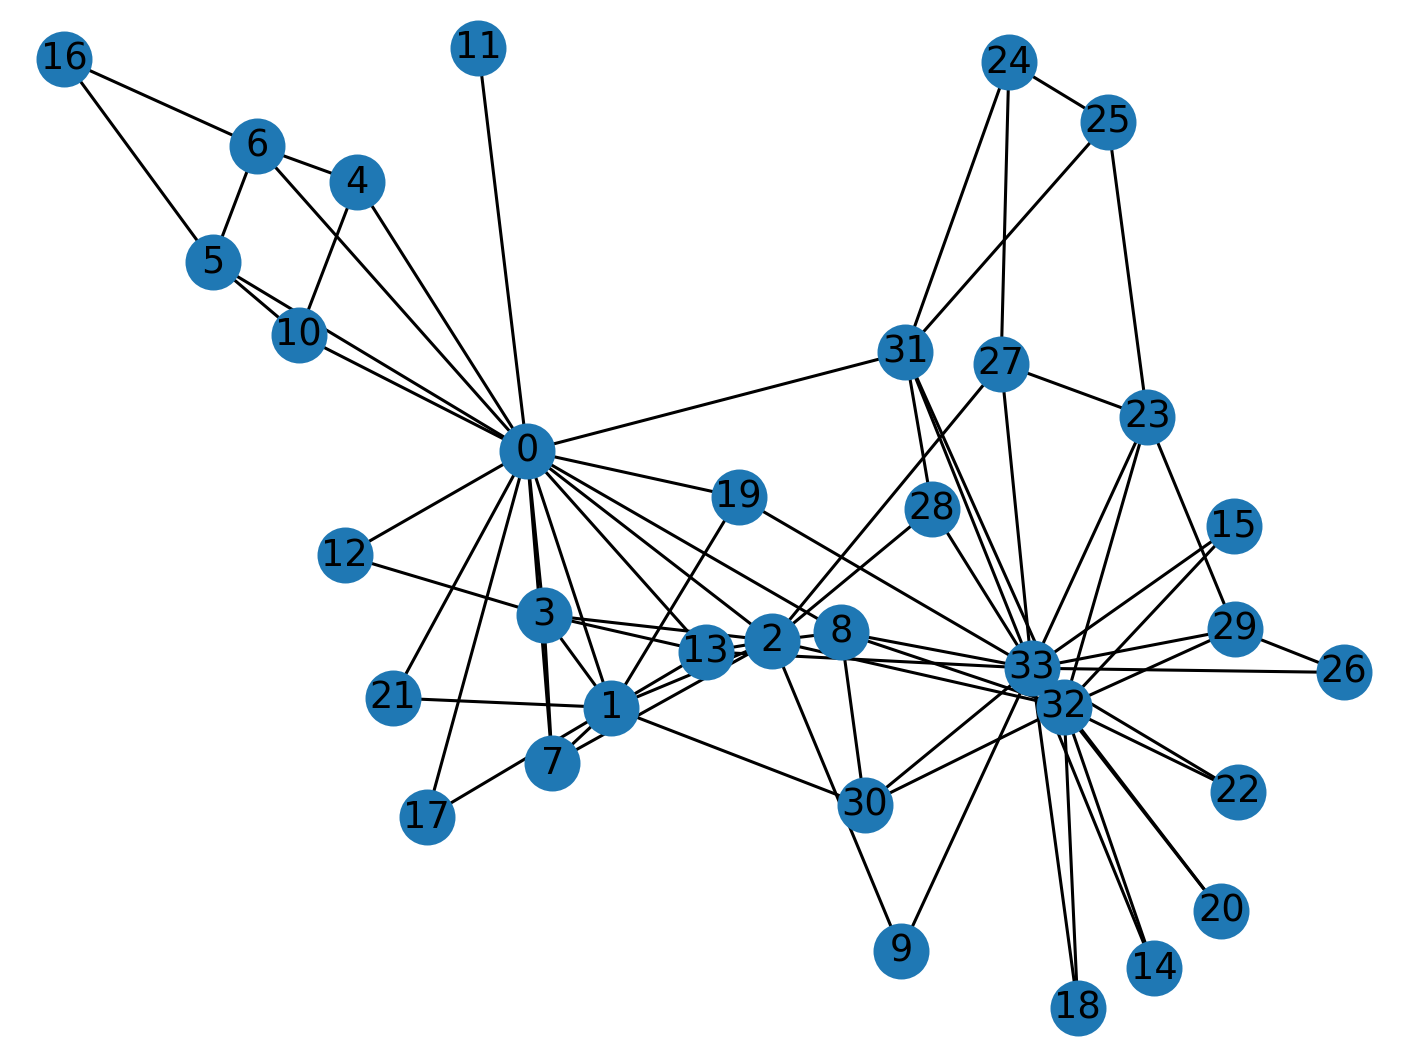

In [11]:
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos)
nx.draw_networkx_labels(g,pos=pos)
plt.show()

### What's the clustering coefficient (transitivity) of this social network?

In [12]:
nx.transitivity(g)

0.2556818181818182

### Is this value large as expected given this is a social network? Let's compare with a random graph (Erdos-Renyi model)

In [28]:
n = len(g.nodes())
m = len(g.edges())
er = nx.gnm_random_graph(n,m)

nx.transitivity(er)


0.116991643454039

In [31]:
# More rigorously,
cc = []
for i in range(1000):
    er = nx.gnm_random_graph(n,m)
    cc.append(nx.transitivity(er))
print("Average transitivity across 100 ER models: ", np.mean(cc))

Average transitivity across 100 ER models:  0.13454977082785677


# What is the average shortest path length of this network?

In [33]:
nx.average_shortest_path_length(g)

2.408199643493761

# Compare this average shortest path length with that of random networks

In [39]:
SPL = []
n = len(g.nodes())
for i in range(100):
    er = nx.gnm_random_graph(n,m)
    while not nx.is_connected(er):
      er = nx.gnm_random_graph(n,m)
    SPL.append(nx.average_shortest_path_length(er))
print("Average SPL across 100 ER models: ",np.mean(SPL))

Average SPL across 100 ER models:  2.4084491978609623


### Which node has the largest betweenness centrality?
Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

In [40]:
bc = nx.betweenness_centrality(g)
bc

{'0': 0.4376352813852815,
 '1': 0.05393668831168831,
 '2': 0.14365680615680615,
 '3': 0.011909271284271283,
 '4': 0.0006313131313131313,
 '5': 0.02998737373737374,
 '6': 0.029987373737373736,
 '7': 0.0,
 '8': 0.05592682780182782,
 '10': 0.0006313131313131313,
 '11': 0.0,
 '12': 0.0,
 '13': 0.045863395863395856,
 '17': 0.0,
 '19': 0.03247504810004811,
 '21': 0.0,
 '31': 0.13827561327561327,
 '30': 0.014411976911976905,
 '9': 0.0008477633477633478,
 '27': 0.022333453583453587,
 '28': 0.0017947330447330447,
 '32': 0.14524711399711404,
 '16': 0.0,
 '33': 0.30407497594997596,
 '14': 0.0,
 '15': 0.0,
 '18': 0.0,
 '20': 0.0,
 '22': 0.0,
 '23': 0.017613636363636363,
 '25': 0.0038404882154882162,
 '29': 0.0029220779220779218,
 '24': 0.0022095959595959595,
 '26': 0.0}

In [45]:
max_bc_node = max(bc,key=bc.get)
max_bc_node,bc[max_bc_node]

('0', 0.4376352813852815)

<IPython.core.display.Javascript object>


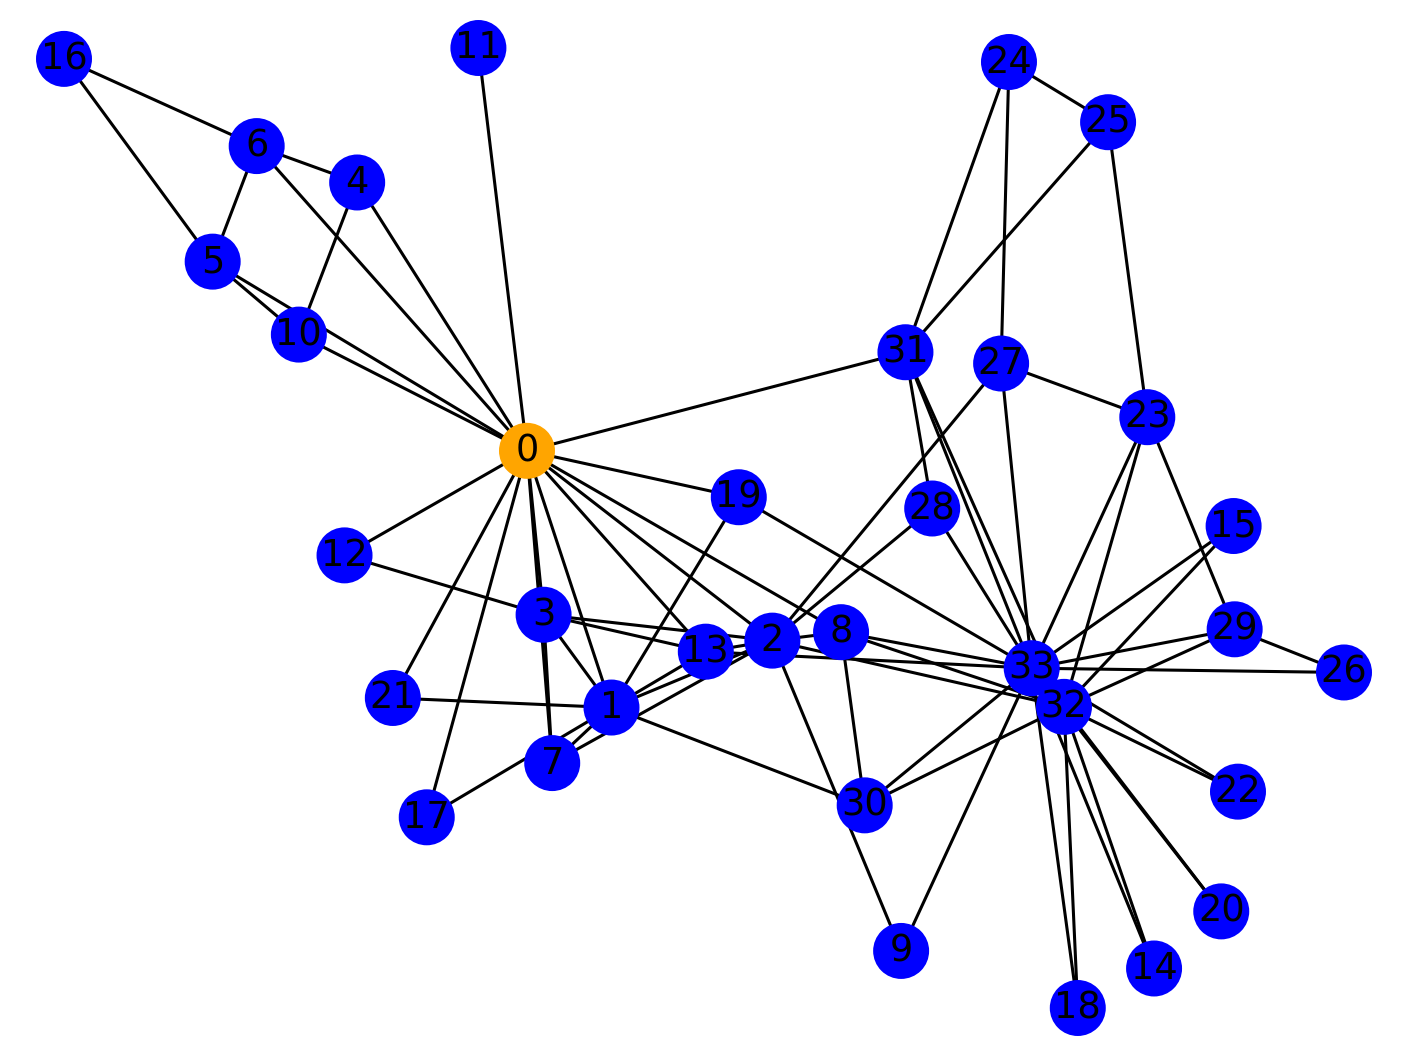

In [46]:
color_map = []
for node in g.nodes():
    if node == max_bc_node:
        color_map.append('orange')
    else:
        color_map.append('blue')
pos = nx.spring_layout(g,seed=1)
nx.draw(g, pos=pos, node_color=color_map)
nx.draw_networkx_labels(g,pos=pos)
plt.show()

### What happens if you remove a node with the largest betweenness centrality?

<IPython.core.display.Javascript object>


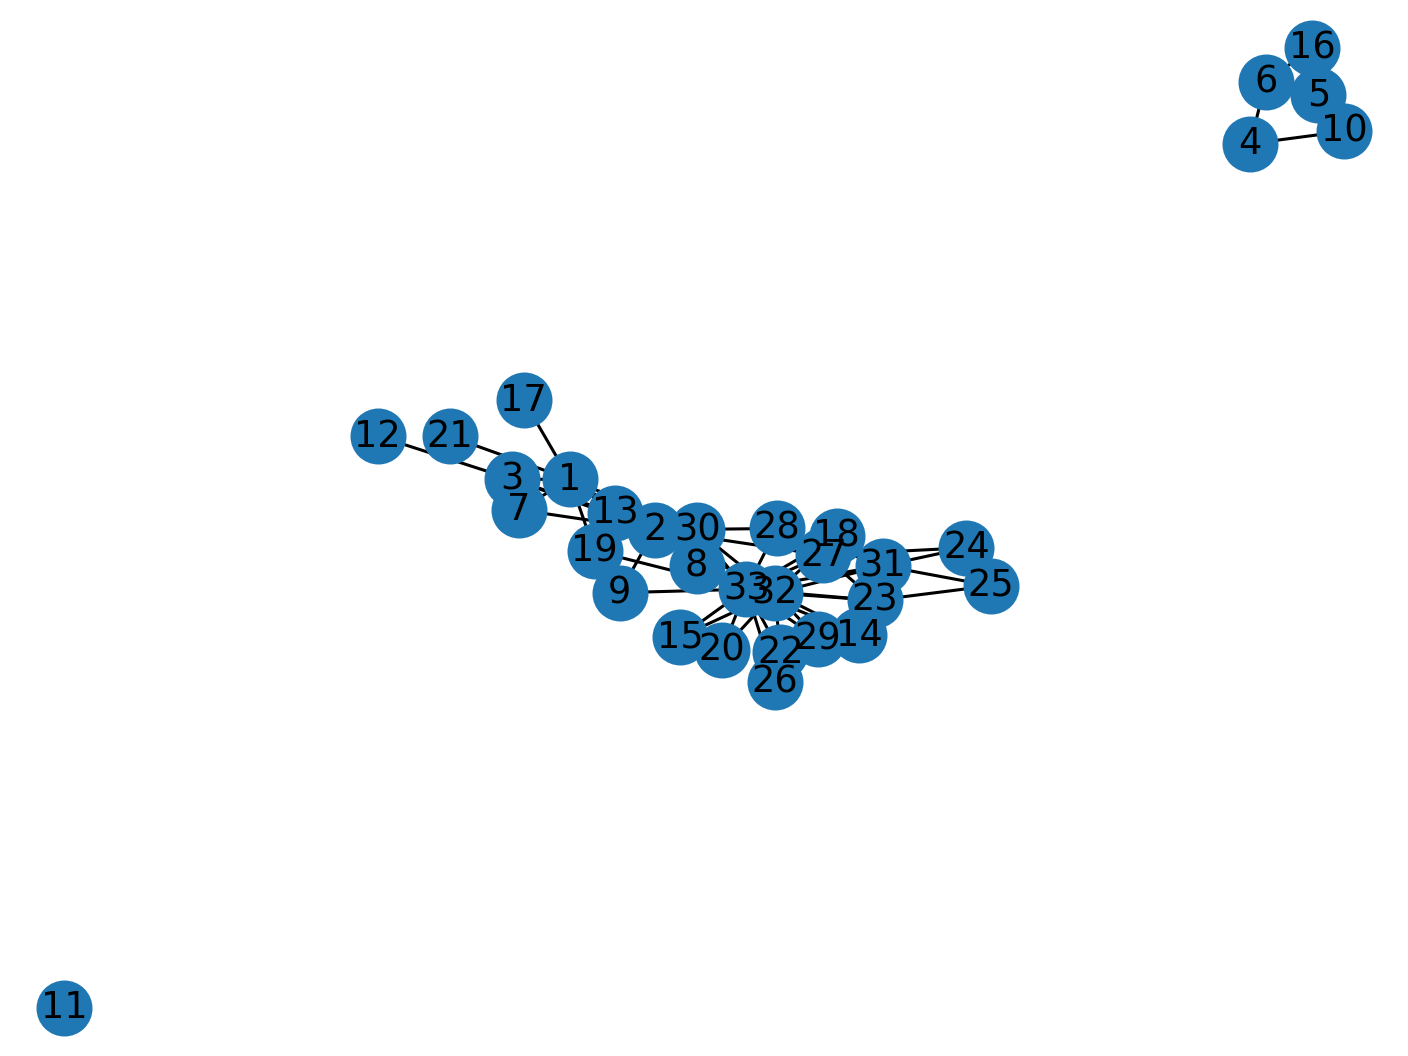

In [47]:
sg = g.copy()
sg.remove_node(max_bc_node)
pos = nx.spring_layout(sg,seed=1)
nx.draw(sg, pos=pos)
nx.draw_networkx_labels(sg,pos=pos)
plt.show()